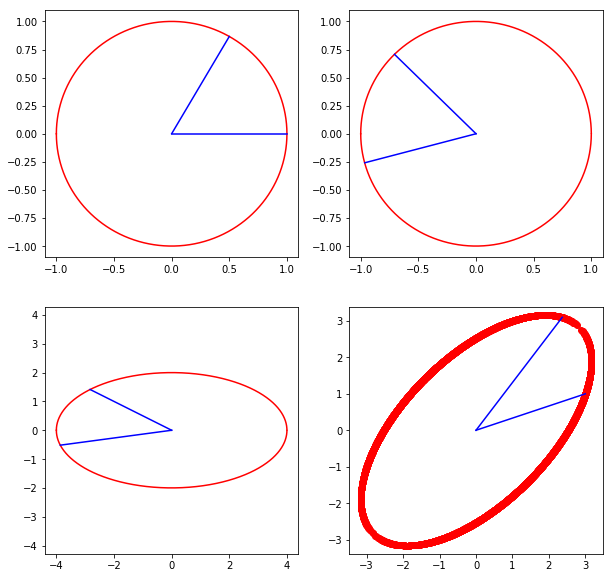

Norm of A - svd_approx result: 0.524249612424
Result from provided code: 0.524249612424
703 7.86373824326e-09
702 751.030776978
701 924.161821167
700 1230.03250424
699 1839.83788688


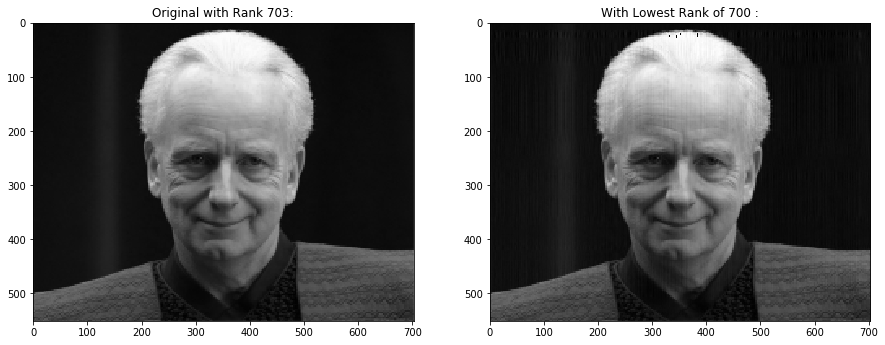

970 3.70141960279e-08
969 1113.57670722
968 1562.08945718
967 2050.74796068
966 3100.722855


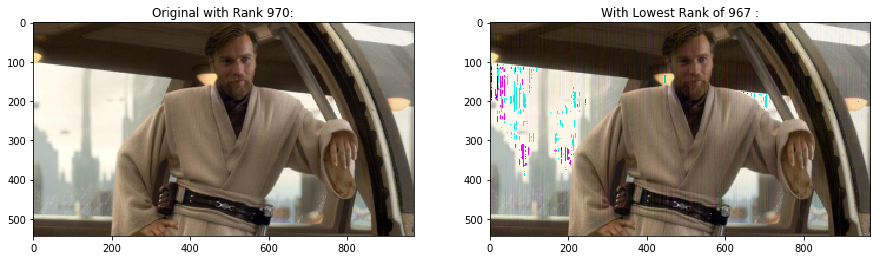

In [1]:
# Harry Feng

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Converts super small numbers to 0
def _round(matrix, limit=0.00000001):
    ret = []
    for number in matrix:
        if(abs(number) > limit):
            ret.append(number)
        else:
            ret.append(0.)
    return ret

def truncated_svd(matrix_A, int_k = None):
    matrix_A = np.matrix(matrix_A)
    AHA = matrix_A.getH()*matrix_A
    eigens = np.linalg.eig(AHA)
    eigenvalues = _round(eigens[0])
    eigenvectors = eigens[1]
    
    # Finds the order of how to sort eigenvalues and sorts the eigenvalues & eigenvectors accordingly
    sorted_eigenvalues = []
    sorting_order = np.argsort(eigenvalues)[::-1]
    for index in sorting_order:
        sorted_eigenvalues.append(eigenvalues[index])
    temp = [eigenvectors[:,i] for i in sorting_order]
    sorted_eigenvectors = np.hstack(tuple(temp))
    
    # Finds the singular values
    singular_values = []
    for number in eigenvalues:
        if(number != 0):
            singular_values.append(abs(number)**0.5)
        else:
            singular_values.append(0)
    singular_values.sort(reverse=True)
    if(int_k != None):
        singular_values = singular_values[0:int_k]
    
    V = np.hstack(tuple([sorted_eigenvectors[:,i] for i in range(len(singular_values)) if singular_values[i] != 0]))
    U = np.hstack(tuple([matrix_A*sorted_eigenvectors[:,i]/singular_values[i] for i in range(len(singular_values)) if singular_values[i] != 0]))
    
    number_of_nonzero_singular_values = singular_values.index(0) if 0 in singular_values else len(singular_values)
    Sigma = np.identity(number_of_nonzero_singular_values)
    for i in range(number_of_nonzero_singular_values):
        Sigma[i][i] = singular_values[i]
        
    # V has been transposed
    return U, Sigma, V.getH()

def problem2():
    A = np.matrix([[3,1],[1,3]])
    U, Sigma, V = truncated_svd(A)
    v1 = np.matrix([[0.5],[(1-0.5**2)**0.5]])
#     v1 = np.matrix([[0.01],[(1-0.01**2)**0.5]])
    v2 = np.matrix([[1],[(1-1**2)**0.5]])
    unit_vectors = np.hstack((1/np.linalg.norm(v1)*v1,1/np.linalg.norm(v2)*v2))
    fig = plt.figure(figsize=(10, 10))
    
    def graph(formula, x_range):  
        x = np.array(x_range)
        y = formula(x)
        plt.plot(x,y, "r")  

    # Graph (a) [S]
    plt.subplot(2, 2, 1)
    graph(lambda x : (1-x**2)**0.5, np.arange(-1,1,0.00001))
    graph(lambda x : -(1-x**2)**0.5, np.arange(-1,1,0.00001))
    for i in range(len(unit_vectors)):
        point = unit_vectors[:,i]
        slope = point[1]/point[0]
        slope = slope.tolist()
        if(point[0] > 0):
            x = np.array(np.arange(0,point[0],0.001))
        else:
            x = np.array(np.arange(point[0],0,0.001))
        y = slope[0]*x
        plt.plot(x,y,"b-")

    # Graph (b) [V^H S]
    plt.subplot(2, 2, 2)
    graph(lambda x : (1-x**2)**0.5, np.arange(-1,1,0.00001))
    graph(lambda x : -(1-x**2)**0.5, np.arange(-1,1,0.00001))
    VS = V*unit_vectors
    for i in range(len(VS)):
        point = VS[:,i]
        slope = point[1]/point[0]
        slope = slope.tolist()
        if(point[0] > 0):
            x = np.array(np.arange(0,point[0],0.001))
        else:
            x = np.array(np.arange(point[0],0,0.001))
        y = slope[0]*x
#         plt.plot(x,y,"b-")
        plt.plot(-1*x,-1*y,"b-")

    # Graph (c) [Sigma V^H S]
    plt.subplot(2, 2, 3)
    x = np.array(np.arange(-1,1,0.00001))
    y = Sigma.diagonal()[1]*(1-x**2)**0.5
    plt.plot(Sigma.diagonal()[0]*x,y, "r") 
    x = np.array(np.arange(-1,1,0.00001))
    y = -1*Sigma.diagonal()[1]*(1-x**2)**0.5
    plt.plot(Sigma.diagonal()[0]*x,y, "r") 
    SigmaVS = Sigma*V*unit_vectors
    for i in range(len(SigmaVS)):
        point = SigmaVS[:,i]
        slope = point[1]/point[0]
        slope = slope.tolist()
        if(point[0] > 0):
            x = np.array(np.arange(0,point[0],0.001))
        else:
            x = np.array(np.arange(point[0],0,0.001))
        y = slope[0]*x
#         plt.plot(x,y,"b-")
        plt.plot(-1*x,-1*y,"b-")
    plt.axis("equal")

    # Graph (d) [U Sigma V^H S]
    plt.subplot(2, 2, 4)
    x = np.array(np.arange(-1,1,0.001))
    y = Sigma.diagonal()[1]*(1-x**2)**0.5
    for x_coor, y_coor in zip(x, y):
        coor = np.matrix([[Sigma.diagonal()[0]*x_coor],[y_coor]])
        coor = U*coor
        plt.plot(coor[0], coor[1], "ro")
    x = np.array(np.arange(-1,1,0.001))
    y = -1*Sigma.diagonal()[1]*(1-x**2)**0.5
    for x_coor, y_coor in zip(x, y):
        coor = np.matrix([[Sigma.diagonal()[0]*x_coor],[y_coor]])
        coor = U*coor
        plt.plot(coor[0], coor[1], "ro")
    USigmaVS = U*Sigma*V*unit_vectors
    for i in range(len(USigmaVS)):
        point = USigmaVS[:,i]
        slope = point[1]/point[0]
        slope = slope.tolist()
        if(point[0] > 0):
            x = np.array(np.arange(0,point[0],0.001))
        else:
            x = np.array(np.arange(point[0],0,0.001))
        y = slope[0]*x
        plt.plot(x,y,"b-")
#         plt.plot(-1*x,-1*y,"g-")
    plt.axis("equal")
    plt.show()

def svd_approx(matrix_A, int_k):
    U, Sigma, V = truncated_svd(matrix_A)
    U_prime = U[:,0:int_k]
    Sigma_prime = np.identity(int_k)
    for i in range(int_k):
        Sigma_prime[i][i] = Sigma[i][i]
    V_prime = V[:int_k,:]
    A_hat = U_prime*Sigma_prime*V_prime
    return A_hat

def test_svd_approx():
    A = np.matrix([[1,1,3,4], [5,4,3,7], [9,10,10,12], [13,14,15,16], [17,18,19,20]])
    A_hat = svd_approx(A,3)
    print("Norm of A - svd_approx result:",np.linalg.norm(A-A_hat))
    A = np.array([[1,1,3,4], [5,4,3,7], [9,10,10,12], [13,14,15,16], [17,18,19,20]])
    U,s,Vh = np.linalg.svd(A, full_matrices=False)
    S = np.diag(s[:3])
    Ahat = U[:,:3].dot(S).dot(Vh[:3,:])
    ans = np.linalg.norm(A-Ahat)
    print("Result from provided code:",ans)
    
def lowest_rank_approx(matrix_A, pos_num_e):
    rank_A = matrix_A.shape[1]
    lowest_rank = rank_A
    for rank in range(rank_A,-1, -1):
        A_hat = svd_approx(matrix_A, rank)
        error = np.linalg.norm(matrix_A-A_hat)
        print(rank, error)
        if(error > pos_num_e):
            break
        lowest_rank = rank
    return lowest_rank

def compress_img(filename, k):
    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    title_str = "Original with Rank " + str(filename.shape[1]) + ":"
    plt.title(title_str)
    plt.imshow(filename)
    plt.subplot(2, 2, 2)
    title_str = "With Lowest Rank of " + str(k) + " :" 
    plt.title(title_str)
    A_hat_1 = svd_approx(filename[:,:,0], k)
    A_hat_2 = svd_approx(filename[:,:,1], k)
    A_hat_3 = svd_approx(filename[:,:,2], k)
    A_hat = np.stack((np.array(A_hat_1),np.array(A_hat_2),np.array(A_hat_3)), axis=2)
    plt.imshow(abs(A_hat/255))
    plt.show()

def test_compress_img():
    img1 = mpimg.imread('image1.jpg')
    ERROR = 1500
    rank = lowest_rank_approx(img1[:,:,0], ERROR)
    compress_img(img1,rank);

    img2 = mpimg.imread('image2.jpg')
    ERROR = 2500
    rank = lowest_rank_approx(img2[:,:,0], ERROR)
    compress_img(img2,rank);
    
def main():
    problem2()
    test_svd_approx()
    test_compress_img()
    

if __name__ == "__main__":
    main()